### **Exploratory Data Analysis**:

**Objective**: This notebook presents the exploratory data analysis for the merged dataset. In this notebook we will seek to understand in more depth what the data we are working with looks like and what it tells us.

---


#### **First Step**: Understanding what data we have:

Task:
- Load the merge dataset. 
- Find insights with the functions of analysis_functions.py
- What data types do we have?
- What categorical variables do we have?

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import sys
import os
import logging

logging.basicConfig(level=logging.INFO)

# Remove the column display limit to show all columns in the DataFrame
pd.set_option('display.max_columns', None)

In [44]:
# Add the 'src' folder to sys.path
sys.path.append(os.path.abspath(os.path.join('..', 'src')))

import utils.analysis_functions as analysis_functions

In [45]:
df = pd.read_csv('../data/processed/merged_data.csv')

In [46]:
df.head()

,Happiness_Rank,Country,Happiness_Score,GDP_per_capita,Freedom,Generosity,Perceptions_of_corruption,Year
0,1,Switzerland,7.587,1.39651,0.66557,0.29678,0.41978,2015
1,2,Iceland,7.561,1.30232,0.62877,0.43630,0.14145,2015
2,3,Denmark,7.527,1.32548,0.64938,0.34139,0.48357,2015
3,4,Norway,7.522,1.45900,0.66973,0.34699,0.36503,2015
4,5,Canada,7.427,1.32629,0.63297,0.45811,0.32957,2015


In [47]:
analysis_functions.summary_by_columns(df)

,Column,Data Type,Missing Values,Unique Values,Duplicates,Missing Values (%)
0,Happiness_Rank,int64,0,158,623,0.0
1,Country,object,0,170,611,0.0
2,Happiness_Score,float64,0,715,66,0.0
3,GDP_per_capita,float64,0,741,40,0.0
4,Freedom,float64,0,696,85,0.0
5,Generosity,float64,0,663,118,0.0
6,Perceptions_of_corruption,float64,0,635,146,0.0
7,Year,int64,0,5,776,0.0


*As we can see, the dataset has no null values, its only categorical variables are `Country` and is composed of 170 countries, `Year` composed of 5 years, and the `Happiness_Rank`.*

---

#### **Second Step**: Making graphs

Task:
- Perform descriptive graphs to better understand the data.

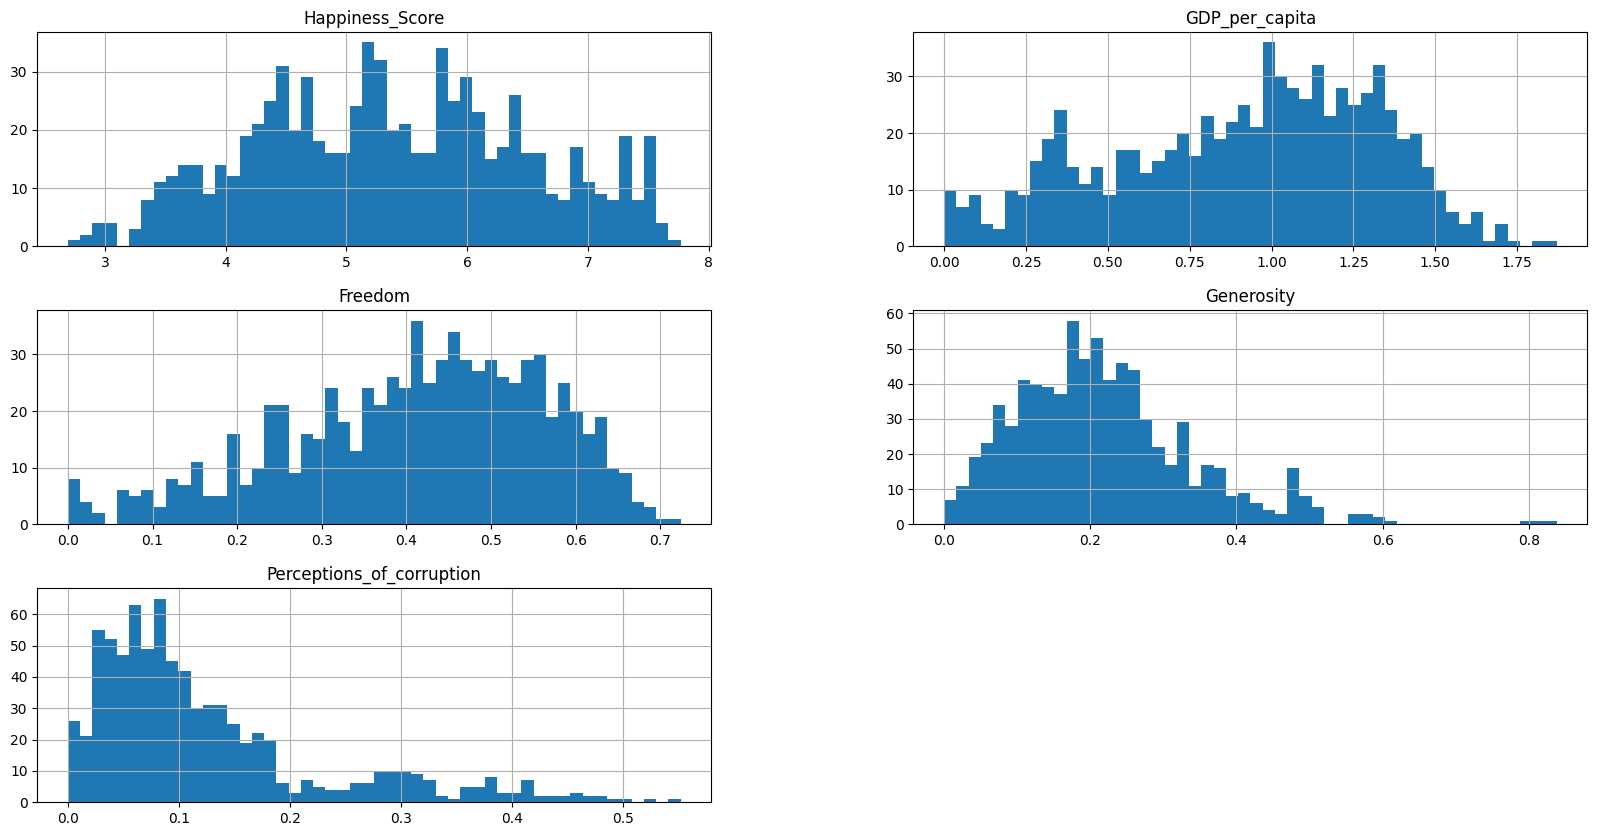

In [48]:
# Histograms of all columns
# Exclude Year, Happiness_Rank and Country
df_with_no_categorical = df.drop(['Year', 'Happiness_Rank', 'Country'], axis=1)


df_with_no_categorical.hist(bins=50, figsize=(20, 10))
plt.show()

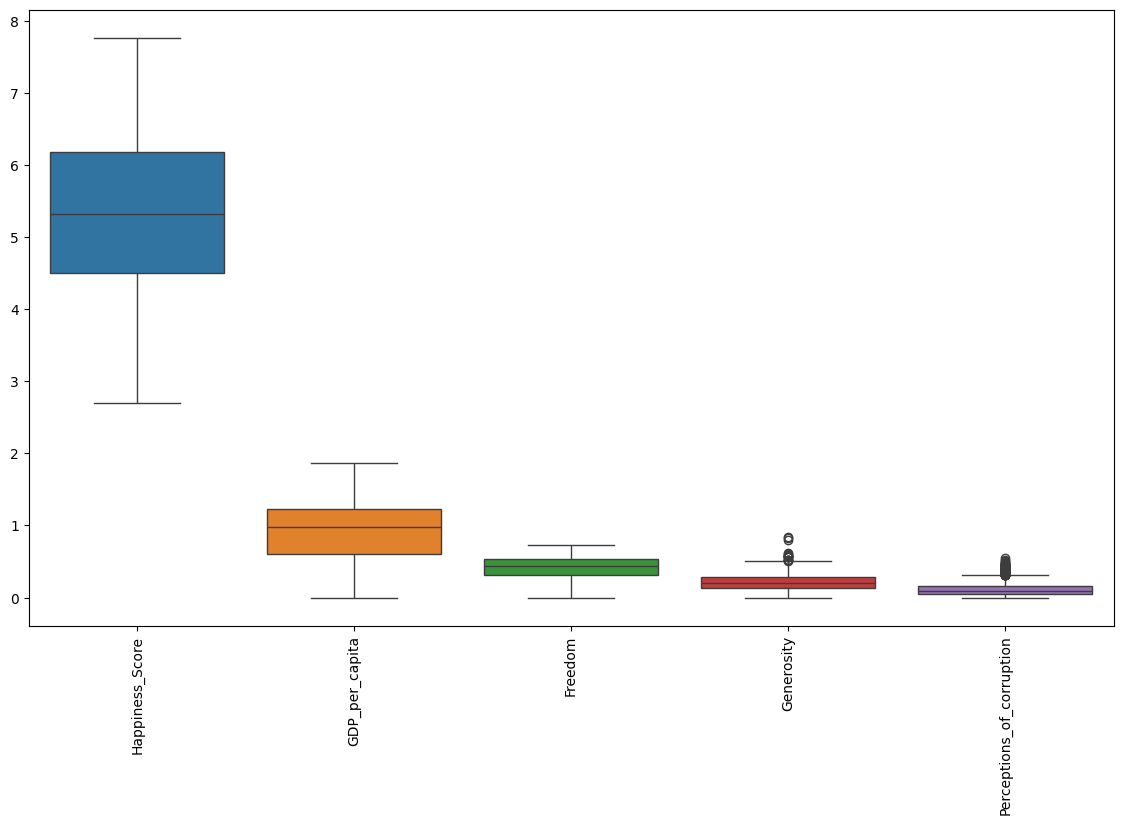

In [49]:
# Boxplots to detect outliers
plt.figure(figsize=(14, 8))
sns.boxplot(data=df_with_no_categorical)
plt.xticks(rotation=90)
plt.show()

*In this case I excluded the `Happiness_Rank` since it represents a ranking, it will not be very relevant for the boxplot, as in `Year`, since although it is a numerical variable, it really represents a category.*

---

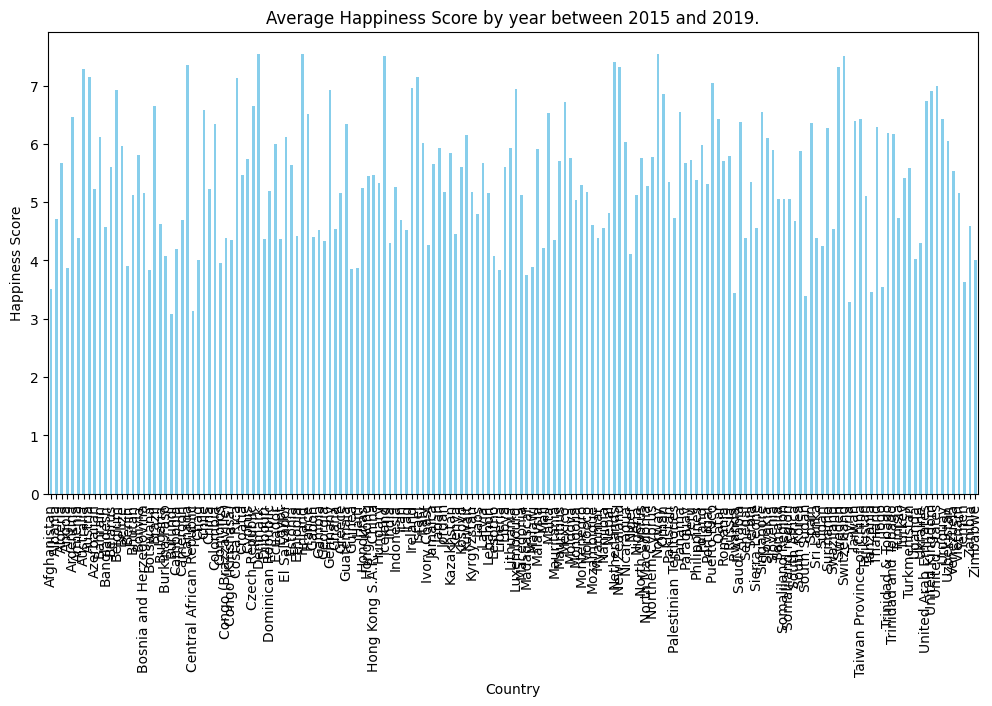

In [50]:
# 
plt.figure(figsize=(12, 6))
df.groupby('Country')['Happiness_Score'].mean().plot(kind='bar', color='skyblue')
plt.title('Average Happiness Score by year between 2015 and 2019.')
plt.ylabel('Happiness Score')
plt.xlabel('Country')
plt.show()

> **🚧NOTE:** *As we can see, since we have so many countries. Making a bar chart with all of them is too difficult to interpret and visualize. So I will proceed to make the following graphs as an alternative*
> 1. Top 10 of the best Happiness Score. 
> 2. Top 10 of the worst Happiness Score. 

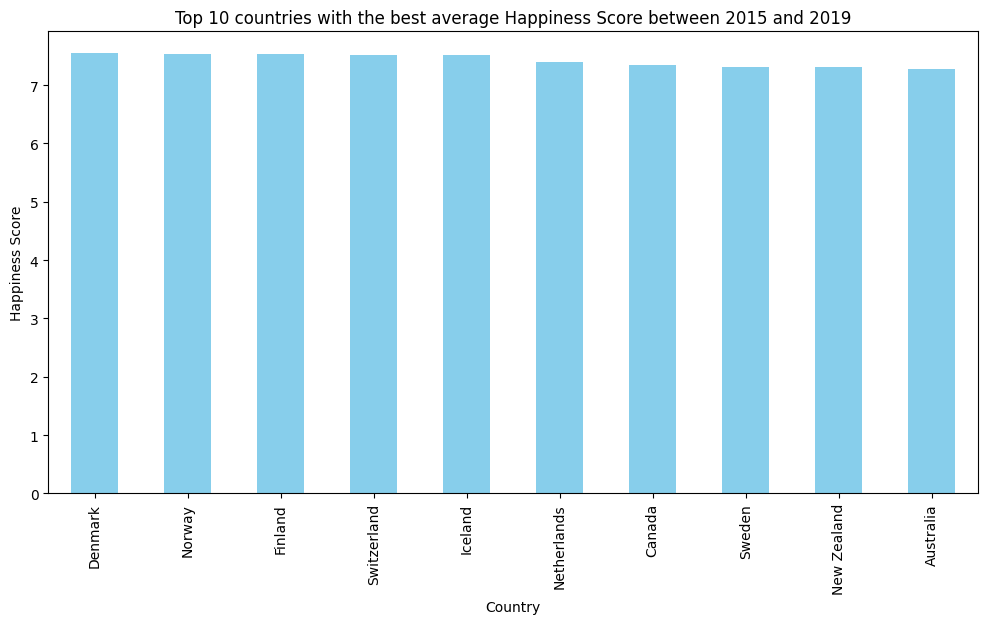

In [51]:
# What are the top 10 countries which have had the best average Happiness Score between 2015 and 2019?
top_10_countries = df.groupby('Country')['Happiness_Score'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
top_10_countries.plot(kind='bar', color='skyblue')
plt.title('Top 10 countries with the best average Happiness Score between 2015 and 2019')
plt.ylabel('Happiness Score')
plt.xlabel('Country')
plt.show()

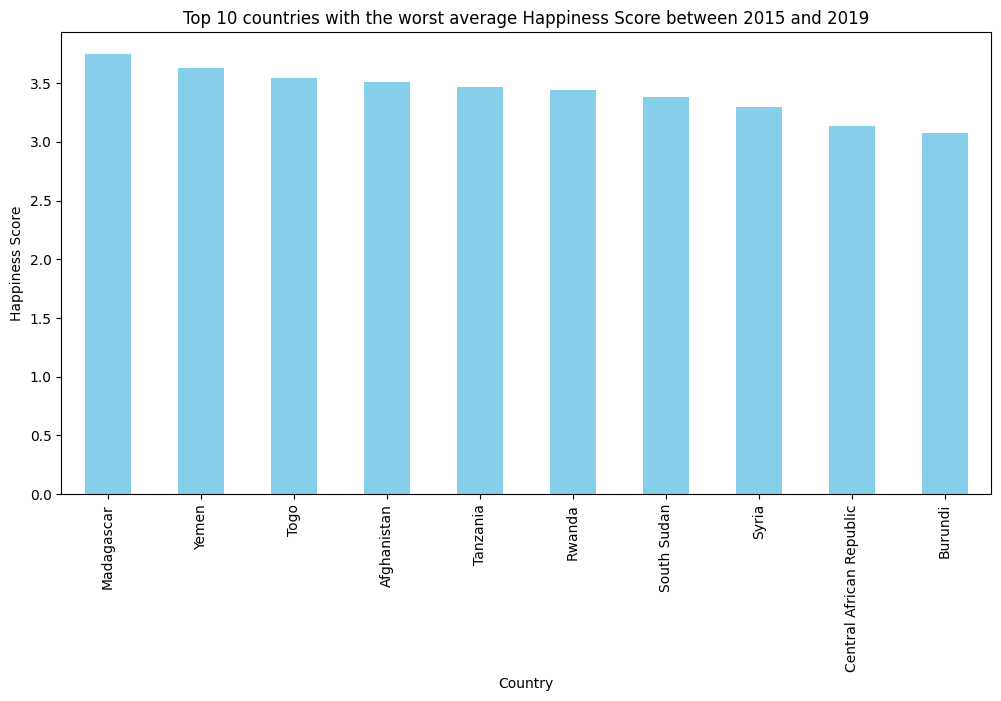

In [52]:
# What are the top 10 countries which have had the worst Happiness Score on average between 2015 and 2019?
bottom_10_countries = df.groupby('Country')['Happiness_Score'].mean().sort_values(ascending=False).tail(10)

plt.figure(figsize=(12, 6))
bottom_10_countries.plot(kind='bar', color='skyblue')
plt.title('Top 10 countries with the worst average Happiness Score between 2015 and 2019')
plt.ylabel('Happiness Score')
plt.xlabel('Country')
plt.show()


---

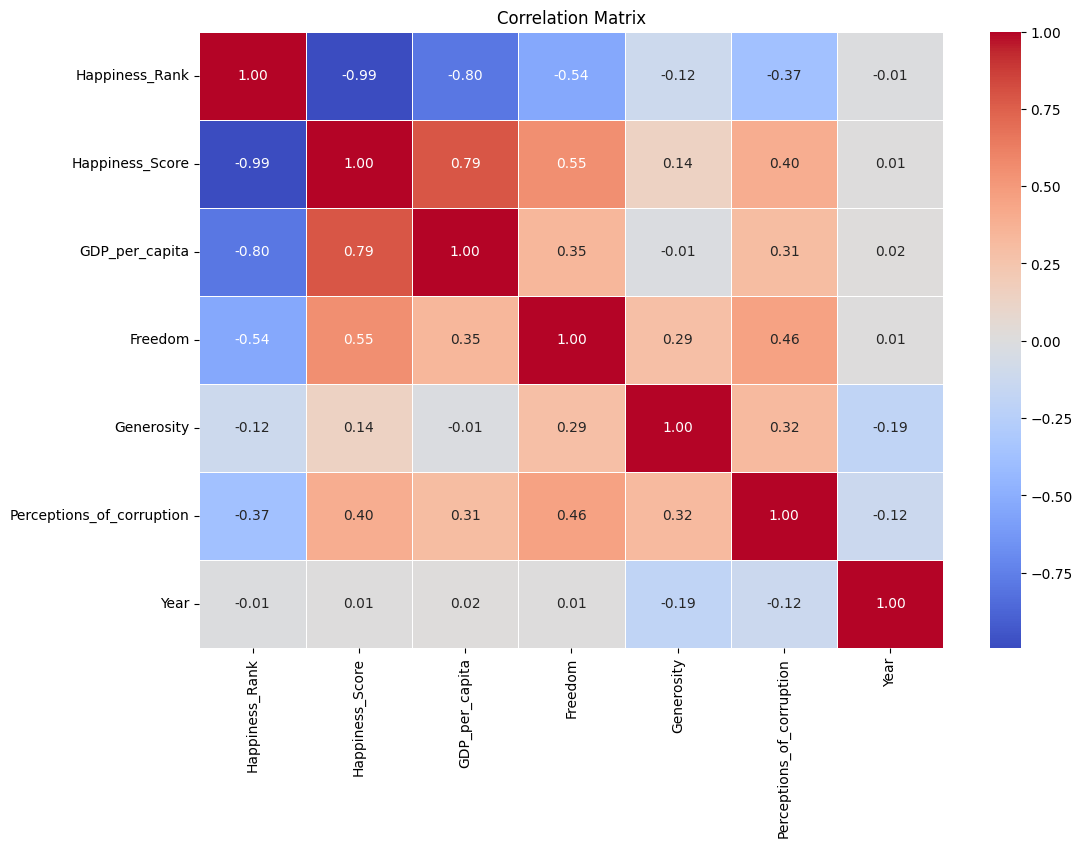

In [53]:
analysis_functions.plot_correlation_matrix(df)

> **🔦Findings:**
>
> 1. `Happiness_Score` has a high negative correlation with `Happiness_Rank` (-0.99), which is logical because a better (lower) happiness ranking is associated with a higher score.
> 
> 2. `GDP_per_capita` shows a considerable positive correlation with `Happiness_Score` (0.79). This indicates that higher GDP per capita is usually associated with higher levels of happiness. This variable is probably important for the model.
> 
> 3. `Freedom` also has a moderate positive correlation (0.55) with `Happiness_Score`, suggesting that countries where people feel more freedom tend to have higher levels of happiness.
> 
> 4. `Perceptions_of_corruption` has a moderate correlation (0.40) with the `Happiness_Score`, implying that a lower perception of corruption in society is related to higher happiness.
> 
> 5. `Generosity` and `Year` have very low correlations with the `Happiness_Score` (0.14 and 0.01 respectively), suggesting that they may not contribute much to the model.

---

*I will now make scatter plots between the numerical variables*

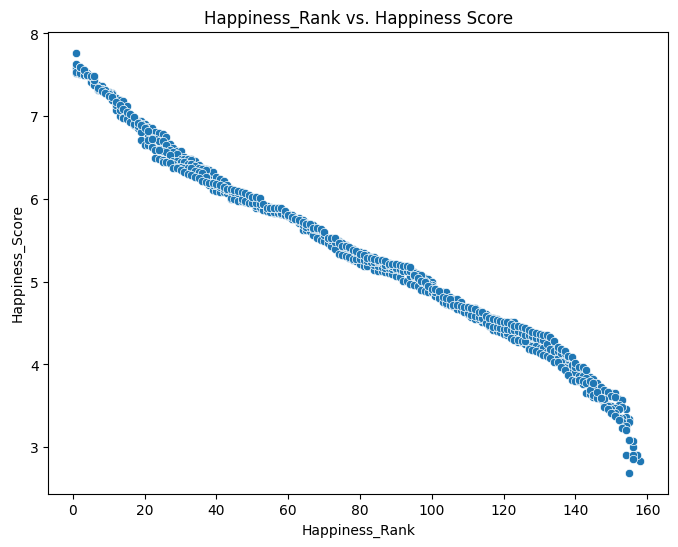

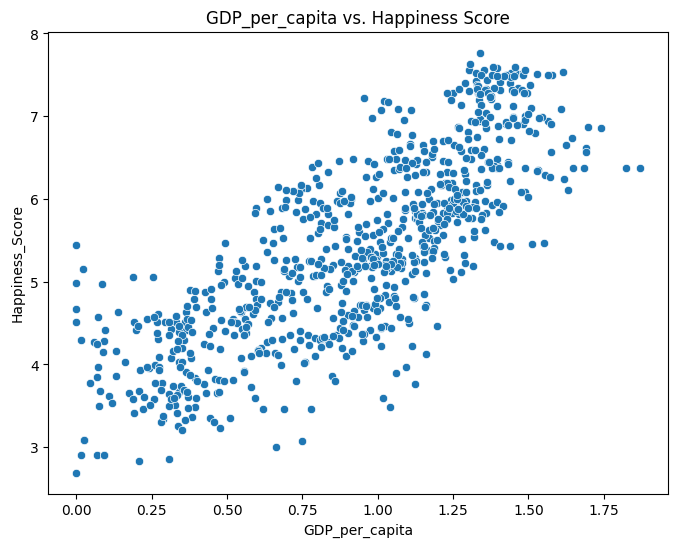

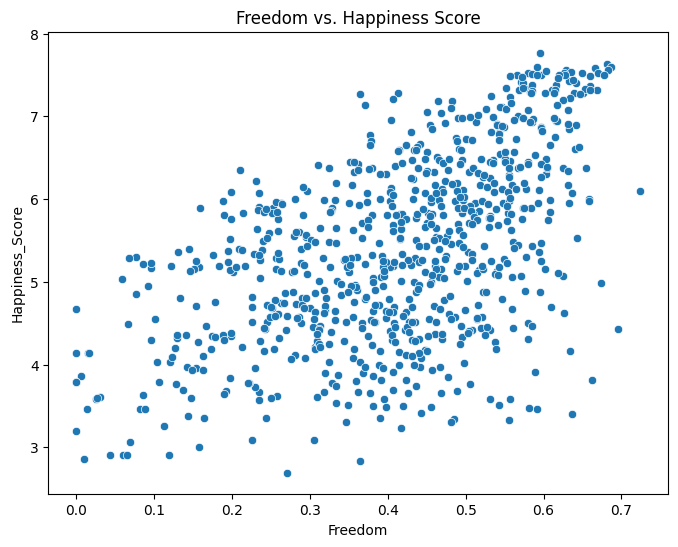

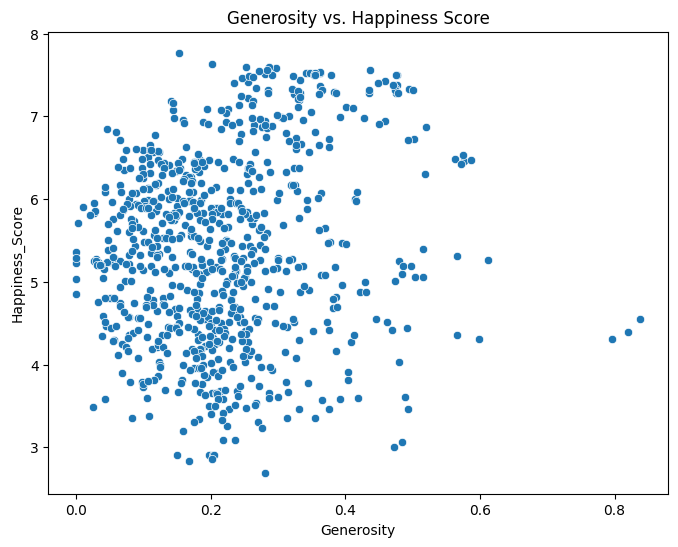

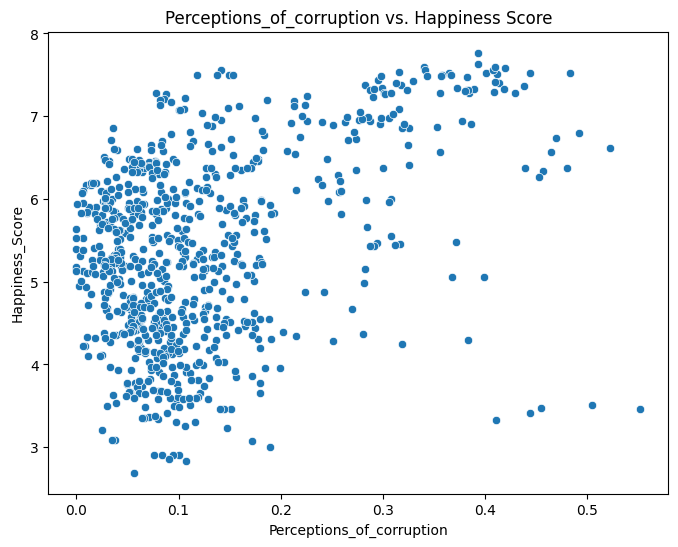

In [54]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

for var in numeric_columns:
    if var == 'Happiness_Score' or var == 'Year':
        continue
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=df, x=var, y='Happiness_Score')
    plt.title(f'{var} vs. Happiness Score')
    plt.show()

> **🔦Findings:**
>
> 1. `Happiness_Rank` vs. `Happiness_Score`: This plot shows a very strong negative relationship, as evidenced by the near-perfect inverse correlation (-0.99). The points form a clear downward line, indicating that higher happiness scores correspond to better (lower) ranks. This aligns with the expected relationship where a high happiness score leads to a top rank.
>
> 2. `GDP_per_capita` vs. `Happiness_Score`: The scatter plot here demonstrates a strong positive correlation (0.79). There is an upward trend, with countries having higher GDP per capita generally scoring higher in happiness. This confirms the significant role of economic prosperity in boosting happiness.
>
> 3. `Freedom` vs. `Happiness_Score`: This plot shows a moderate positive trend, consistent with the correlation of 0.55. As perceived freedom increases, happiness scores also tend to rise. While the points are more spread out than the GDP correlation, the upward pattern still supports freedom as a contributor to happiness.
>
> 4. `Generosity` vs. `Happiness_Score`: The scatter plot for generosity displays little to no clear trend, confirming the low correlation (0.14). The points are widely scattered, suggesting that generosity has minimal impact on happiness levels compared to other factors.
>
> 5. `Perceptions_of_corruption` vs. `Happiness_Score`: This plot shows a moderate positive trend, matching the 0.40 correlation. Countries with lower perceptions of corruption generally have higher happiness scores. Although the spread is broad, a general upward pattern is visible, indicating that reduced corruption perceptions may contribute to happiness.

---

*Finally, we will use the Country column to make a heat map according to the Happiness_Score*

In [55]:
fig = px.choropleth(df, locations="Country", locationmode='country names',
                    color="Happiness_Score", hover_name="Country",
                    color_continuous_scale=px.colors.sequential.Viridis)
fig.update_layout(title="World Happiness Score by Country", geo=dict(showframe=False))
fig.show()

![](../docs/plots/World_Happiness_Score_by_Country.png)

*I'm displaying this image from markdown since only from the notebook you can see the interactive graphic. If you want to generate and interact, I invite you to clone the repository and run it from your machine*

---